In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train (1).csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [5]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(df.drop('price_range',axis=1),df['price_range'],test_size=0.2)

In [6]:
mi = mutual_info_classif(df.drop('price_range',axis=1),df['price_range'])
mi

array([0.02918189, 0.        , 0.00167044, 0.01627404, 0.01105866,
       0.        , 0.00473145, 0.        , 0.00841888, 0.        ,
       0.        , 0.02531977, 0.02575298, 0.84951673, 0.00363411,
       0.        , 0.        , 0.        , 0.00498112, 0.00717414])

<AxesSubplot:>

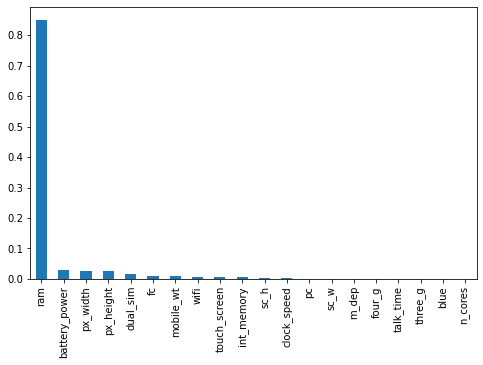

In [9]:
a = df.drop('price_range',axis=1)
mi = pd.Series(mi)
mi.index = a.columns
mi.sort_values(ascending=False).plot.bar(figsize=(8,5))

In [10]:
sel_ = SelectKBest(mutual_info_classif,k=10).fit(df.drop('price_range',axis=1),df['price_range'])

In [12]:
a.columns[sel_.get_support()]

Index(['battery_power', 'dual_sim', 'n_cores', 'px_height', 'px_width', 'ram',
       'sc_h', 'sc_w', 'talk_time', 'touch_screen'],
      dtype='object')

In [14]:
from sklearn.feature_selection import chi2

In [15]:
f_score = chi2(df.drop('price_range',axis=1),df['price_range'])
f_score

(array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
        1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
        9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
        9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
        1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01]),
 array([0.00000000e+00, 8.67726342e-01, 8.85276201e-01, 8.89297893e-01,
        1.74514323e-02, 6.77300459e-01, 2.37197834e-19, 8.62377379e-01,
        1.14084978e-20, 2.80215610e-02, 2.69167984e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.21401351e-02, 9.03765912e-04,
        4.15229208e-03, 9.54748475e-01, 5.87393502e-01, 9.35642196e-01]))

<AxesSubplot:>

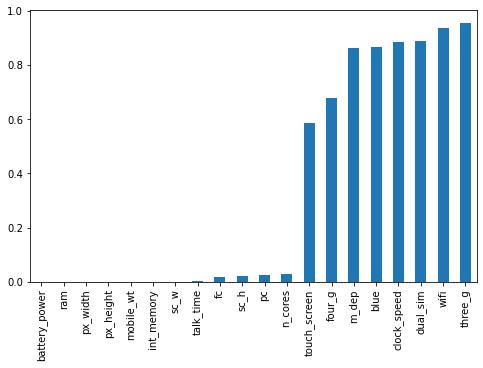

In [24]:
b = df.drop('price_range',axis=1)
p_value = pd.Series(f_score[1])
p_value.index = b.columns
p_value.sort_values(ascending=True).plot.bar(figsize=(8,5))

In [27]:
sel2_ = SelectKBest(chi2,k=10).fit(df.drop('price_range',axis=1),df['price_range'])

In [28]:
b.columns[sel2_.get_support()]

Index(['battery_power', 'fc', 'int_memory', 'mobile_wt', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')

In [29]:
from sklearn.feature_selection import f_classif

In [32]:
anova = f_classif(df.drop('price_range',axis=1),df['price_range'])
anova

(array([3.15981575e+01, 4.76767709e-01, 4.93707801e-01, 4.28239286e-01,
        7.72181960e-01, 1.05952453e+00, 2.92299608e+00, 1.50068244e+00,
        3.59431819e+00, 2.62541515e+00, 8.25446358e-01, 1.94848418e+01,
        2.26208825e+01, 3.52011082e+03, 2.22598374e+00, 1.67099983e+00,
        1.62881131e+00, 4.57319750e-01, 1.29330223e+00, 2.84940470e-01]),
 array([5.94868828e-20, 6.98483110e-01, 6.86675162e-01, 7.32786931e-01,
        5.09504159e-01, 3.65155201e-01, 3.27769388e-02, 2.12459493e-01,
        1.31173907e-02, 4.89358505e-02, 4.79748902e-01, 1.88608480e-12,
        2.11691089e-14, 0.00000000e+00, 8.32499108e-02, 1.71214577e-01,
        1.80668647e-01, 7.12150681e-01, 2.75043308e-01, 8.36306962e-01]))

<AxesSubplot:>

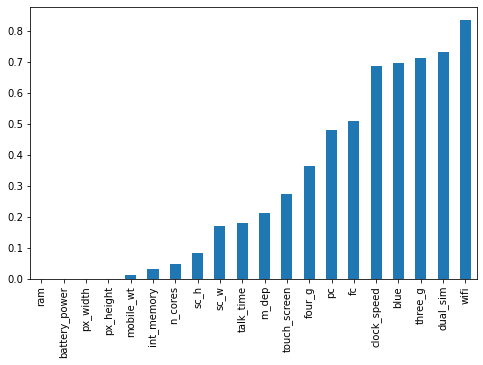

In [35]:
c = df.drop('price_range',axis=1)
univariate = pd.Series(anova[1])
univariate.index = c.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(8,5))

In [36]:
sel3_ = SelectKBest(f_classif,k=10).fit(df.drop('price_range',axis=1),df['price_range'])

In [37]:
c.columns[sel3_.get_support()]

Index(['battery_power', 'int_memory', 'mobile_wt', 'n_cores', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],
      dtype='object')